# Name: Shaswata Das
# Registration No: 2017831050

<a target="_blank" href="https://colab.research.google.com/github/shaswata56/ML-Lab/blob/main/Final/ML_Lab_Final_Assignment.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# Importing Modules
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 1sA7TEvhSAH3KZrBkad15nGK0reJvuxWx
!unzip -o CNN_dataset.zip

In [ ]:
# Loading Dataset and splitting into train and validation
datasetPath = '/content/CNN_dataset/'

img_datagen = ImageDataGenerator(rescale=1./225,
                                 shear_range=0.4, 
                                 zoom_range=0.4,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 validation_split=0.1)

training_dataset = img_datagen.flow_from_directory(
                                          directory=datasetPath, 
                                          target_size=(64, 64), 
                                          shuffle=True,
                                          batch_size=20, 
                                          subset='training',
                                          class_mode='categorical')

validation_dataset = img_datagen.flow_from_directory(
                                          directory=datasetPath, 
                                          target_size=(64, 64), 
                                          shuffle=True,
                                          batch_size=20, 
                                          subset='validation',
                                          class_mode='categorical')

Found 45000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [ ]:
# The Convolutional Neural Network
cnn_clf = Sequential()
cnn_clf.add(Convolution2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
cnn_clf.add(MaxPool2D(pool_size=(2, 2)))
cnn_clf.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
cnn_clf.add(MaxPool2D(pool_size=(2, 2)))
cnn_clf.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
cnn_clf.add(Flatten())
cnn_clf.add(Dense(64, activation='relu'))
cnn_clf.add(Dense(5, activation='softmax'))
cnn_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [ ]:
# Compiling the model
cnn_clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model Training
history = cnn_clf.fit(training_dataset, epochs=15, validation_data=validation_dataset)

Epoch 1/15
2250/2250 [==============================] - 115s 49ms/step - loss: 0.1526 - accuracy: 0.9448 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 2/15
2250/2250 [==============================] - 99s 44ms/step - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0233 - val_accuracy: 0.9924
Epoch 3/15
2250/2250 [==============================] - 100s 44ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0153 - val_accuracy: 0.9942
Epoch 4/15
2250/2250 [==============================] - 101s 45ms/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0090 - val_accuracy: 0.9968
Epoch 5/15
2250/2250 [==============================] - 99s 44ms/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.0255 - val_accuracy: 0.9934
Epoch 6/15
2250/2250 [==============================] - 101s 45ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0088 - val_accuracy: 0.9964
Epoch 7/15
2250/2250 [==============================] - 100s 44ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0

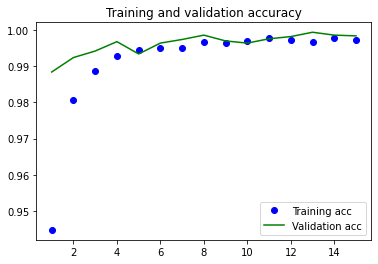

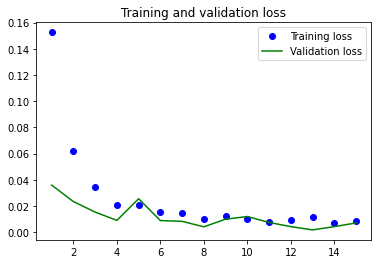

In [ ]:
# Plotting Accuracy vs Loss over the epoch during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()